# LGMVIP DATA SCIENCE

# TASK 5 - Next Word Prediction 

## 1. Installing the libraries

!pip install numpy
!pip install tensorflow
!pip install keras
!pip install nltk

## 2. Importing the libraries

In [1]:
import numpy as np
from nltk.tokenize import RegexpTokenizer
from keras.models import Sequential, load_model
from keras.layers import LSTM
from keras.layers.core import Dense, Activation
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import pickle
import heapq


## 3. Loading the dataset

In [3]:
path = '1661-0.txt'
text = open(path,'r',encoding='utf-8').read().lower()
print('corpus length:', len(text))


corpus length: 581888


## 4. Splitting the entire dataset into each word in order without the presence of special characters

In [4]:
tokenizer = RegexpTokenizer(r'\w+')
words = tokenizer.tokenize(text)

## 5. Dictionary(<key: value>) with each word form the unique_words list as key and its corresponding position as value

In [5]:
unique_words = np.unique(words)
unique_word_index = dict((c, i) for i, c in enumerate(unique_words))

## 6. Feature engineering

In [6]:
WORD_LENGTH = 5
prev_words = []
next_words = []
for i in range(len(words) - WORD_LENGTH):
    prev_words.append(words[i:i + WORD_LENGTH])
    next_words.append(words[i + WORD_LENGTH])
print(prev_words[0])
print(next_words[0])

['project', 'gutenberg', 's', 'the', 'adventures']
of


## 7. One-Hot encoding

In [7]:
X = np.zeros((len(prev_words), WORD_LENGTH, len(unique_words)), dtype=bool)
Y = np.zeros((len(next_words), len(unique_words)), dtype=bool)
for i, each_words in enumerate(prev_words):
    for j, each_word in enumerate(each_words):
        X[i, j, unique_word_index[each_word]] = 1
    Y[i, unique_word_index[next_words[i]]] = 1

In [8]:
print(X[0][0])

[False False False ... False False False]


## 8. Building the model

In [9]:
model = Sequential()
model.add(LSTM(128, input_shape=(WORD_LENGTH, len(unique_words))))
model.add(Dense(len(unique_words)))
model.add(Activation('softmax'))

## 9. Training

In [10]:
optimizer = RMSprop(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(X, Y, validation_split=0.05, batch_size=128, epochs=10, shuffle=True).history

Epoch 1/10


c:\Users\gl 65\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


811/811 [==============================] - 106s 129ms/step - loss: 6.0156 - accuracy: 0.1066 - val_loss: 7.0609 - val_accuracy: 0.1014
Epoch 2/10
811/811 [==============================] - 104s 128ms/step - loss: 5.7871 - accuracy: 0.1474 - val_loss: 7.9896 - val_accuracy: 0.1084
Epoch 3/10
811/811 [==============================] - 110s 136ms/step - loss: 5.7401 - accuracy: 0.1748 - val_loss: 8.0856 - val_accuracy: 0.1108
Epoch 4/10
811/811 [==============================] - 101s 125ms/step - loss: 5.4223 - accuracy: 0.2090 - val_loss: 8.4036 - val_accuracy: 0.1056
Epoch 5/10
811/811 [==============================] - 104s 128ms/step - loss: 5.0980 - accuracy: 0.2490 - val_loss: 8.2817 - val_accuracy: 0.0950
Epoch 6/10
811/811 [==============================] - 108s 133ms/step - loss: 4.8117 - accuracy: 0.2898 - val_loss: 8.5252 - val_accuracy: 0.0923
Epoch 7/10
811/811 [==============================] - 107s 132ms/step - loss: 4.5620 - accuracy: 0.3332 - val_loss: 8.8064 - val_accura

## 10. Saving the model and loading it back

In [11]:
model.save('keras_next_word_model.h5')
pickle.dump(history, open("history.p", "wb"))
model = load_model('keras_next_word_model.h5')
history = pickle.load(open("history.p", "rb"))


In [12]:
history

{'loss': [6.015601634979248,
  5.787065505981445,
  5.740082740783691,
  5.422305107116699,
  5.0980353355407715,
  4.811747074127197,
  4.5620222091674805,
  4.339364528656006,
  4.154418468475342,
  3.9889659881591797],
 'accuracy': [0.10659316182136536,
  0.1473703533411026,
  0.17479929327964783,
  0.20895536243915558,
  0.24904827773571014,
  0.28980618715286255,
  0.3332144618034363,
  0.3727194666862488,
  0.4096319377422333,
  0.44195684790611267],
 'val_loss': [7.060874938964844,
  7.9895758628845215,
  8.085610389709473,
  8.403575897216797,
  8.281734466552734,
  8.525174140930176,
  8.806364059448242,
  8.9148530960083,
  8.897171974182129,
  9.300466537475586],
 'val_accuracy': [0.10142804682254791,
  0.10838520526885986,
  0.11076528578996658,
  0.10563895851373672,
  0.09502013772726059,
  0.09227389097213745,
  0.08586598187685013,
  0.0833028182387352,
  0.07707799226045609,
  0.07817649096250534]}

## 11. Evaluation

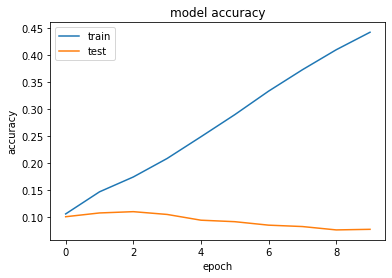

In [13]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')



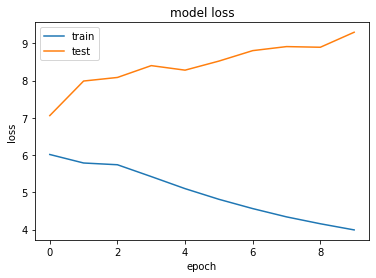

In [14]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

## 12. Prediction

In [15]:
def prepare_input(text):
    x = np.zeros((1, WORD_LENGTH, len(unique_words)))
    for t, word in enumerate(text.split()):
        print(word)
        x[0, t, unique_word_index[word]] = 1
    return x
prepare_input("It is not a lack".lower())

it
is
not
a
lack


array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [16]:
def sample(preds, top_n=3):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds)
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)

    return heapq.nlargest(top_n, range(len(preds)), preds.take)

In [17]:
def predict_completions(text, n=3):
    if text == "":
        return("0")
    x = prepare_input(text)
    preds = model.predict(x, verbose=0)[0]
    next_indices = sample(preds, n)
    return [unique_words[idx] for idx in next_indices]

In [18]:
q =  "There is nothing more deceptive than an obvious fact"
print("correct sentence: ",q)
seq = " ".join(tokenizer.tokenize(q.lower())[0:5])
print("Sequence: ",seq)
print("next possible words: ", predict_completions(seq, 5))


correct sentence:  There is nothing more deceptive than an obvious fact
Sequence:  there is nothing more deceptive
there
is
nothing
more
deceptive
next possible words:  ['than', 'until', 'very', 'first', 'which']
